<a href="https://colab.research.google.com/github/mrdostory/OpenSource_Project/blob/main/Transform_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Drive 연동

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 폴더 위치로 Default 설정

%cd drive/MyDrive/OpenSW2

# import modules

import torch
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt

from network.Transformer import Transformer

/content/drive/MyDrive/OpenSW2


In [ ]:
# 모델 불러오기
# (Hayao_net_G_float.pth / Hosoda_net_G_float.pth /Paprika_net_G_float.pth /Shinkai_net_G_float.pth)

model = Transformer()
model.load_state_dict(torch.load('pretrained_model/Shinkai_net_G_float.pth'))  
model.eval()
print('Model loaded!')

Model loaded!


/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


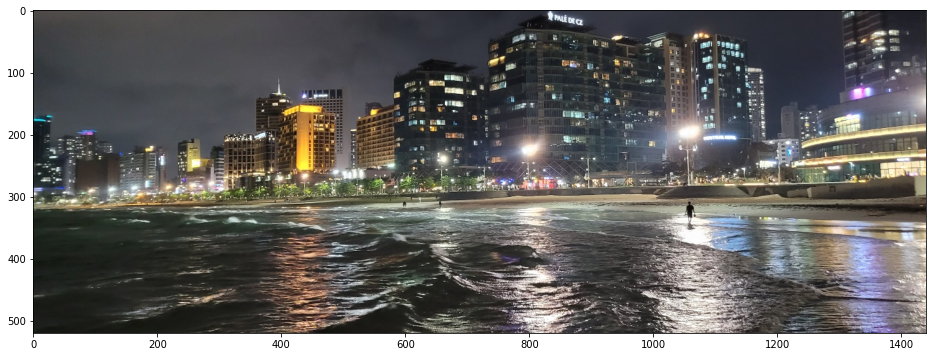

In [ ]:
# 전처리 과정

img_size = 450
img_path = 'test_img/Do5.jpg'  // 전처리를 원하는 이미지 파일에 설정

img = cv2.imread(img_path)

T = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(img_size, 2),
    transforms.ToTensor()
])

img_input = T(img).unsqueeze(0)

img_input = -1 + 2 * img_input # 0 - 1 -> -1 - +1

plt.figure(figsize=(16, 10))
plt.imshow(img[:, :, ::-1])

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


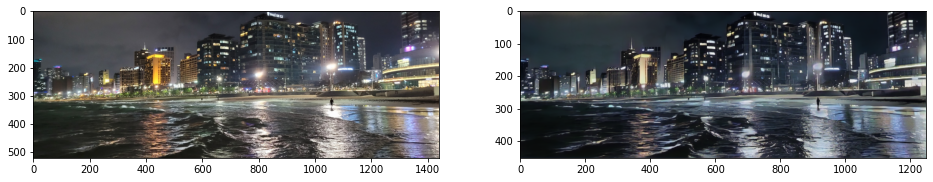

In [ ]:
# 결과 출력

img_output = model(img_input)

img_output = (img_output.squeeze().detach().numpy() + 1.) / 2.
img_output = img_output.transpose([1, 2, 0])

fig, axes = plt.subplots(1, 2, figsize=(16, 16))
axes[0].imshow(img[:, :, ::-1])
axes[1].imshow(img_output[:, :, ::-1])